In [2]:
import sys
sys.path.append('../')

%load_ext autoreload
%autoreload 2
%matplotlib inline


In [25]:
import numpy as np

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from skimage.io import imread
import cv2

from gen.load_data import load_data
from gen.generators import preprocess_label


In [4]:
train_df, valid_df, test_df = load_data('../data')

In [5]:
train_df.head()

image                   id  \
0  ../data/Train/CameraRGB/episode_0002_000287.png  episode_0002_000287   
1                  ../data/Train/CameraRGB/804.png                  804   
2  ../data/Train/CameraRGB/episode_0003_000261.png  episode_0003_000261   
3                  ../data/Train/CameraRGB/793.png                  793   
4                  ../data/Train/CameraRGB/512.png                  512   

                                             label  
0  ../data/Train/CameraSeg/episode_0002_000287.png  
1                  ../data/Train/CameraSeg/804.png  
2  ../data/Train/CameraSeg/episode_0003_000261.png  
3                  ../data/Train/CameraSeg/793.png  
4                  ../data/Train/CameraSeg/512.png

In [6]:
valid_df.head()

image     id                              label
0  ../data/Valid/CameraRGB/00019.png  00019  ../data/Valid/CameraSeg/00019.png
1  ../data/Valid/CameraRGB/00413.png  00413  ../data/Valid/CameraSeg/00413.png
2  ../data/Valid/CameraRGB/00035.png  00035  ../data/Valid/CameraSeg/00035.png
3  ../data/Valid/CameraRGB/00264.png  00264  ../data/Valid/CameraSeg/00264.png
4  ../data/Valid/CameraRGB/00172.png  00172  ../data/Valid/CameraSeg/00172.png

In [7]:
test_df.head()

image     id                             label
0  ../data/Test/CameraRGB/00019.png  00019  ../data/Test/CameraSeg/00019.png
1  ../data/Test/CameraRGB/00413.png  00413  ../data/Test/CameraSeg/00413.png
2  ../data/Test/CameraRGB/00035.png  00035  ../data/Test/CameraSeg/00035.png
3  ../data/Test/CameraRGB/00264.png  00264  ../data/Test/CameraSeg/00264.png
4  ../data/Test/CameraRGB/00172.png  00172  ../data/Test/CameraSeg/00172.png

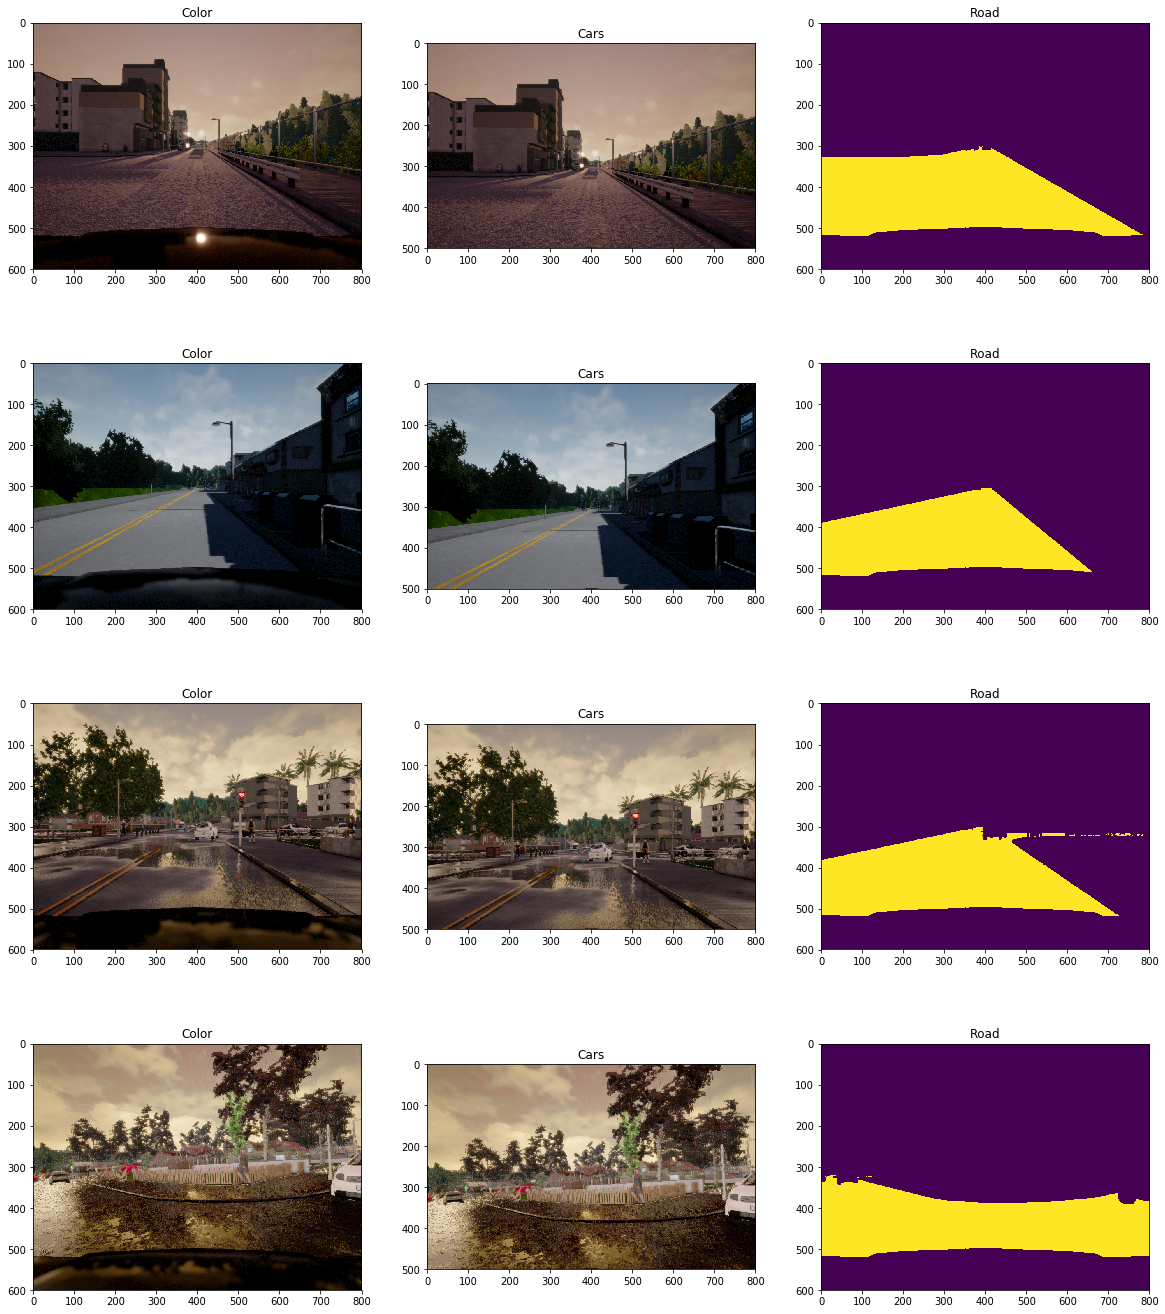

In [29]:
sample_rows = 4
fig, m_axs = plt.subplots(sample_rows, 3, figsize = (20, 6*sample_rows))
for (ax1, ax2, ax3), (_, c_row) in zip(m_axs, train_df.sample(sample_rows).iterrows()):
    c_img = imread(c_row['image'])
    
    c_img2 = c_img[:500, :, :]
    l_img = imread(c_row['label'])
#     l_img = l_img[:500, :, 0]
    
    lbls = np.zeros_like(l_img)
    lbls[l_img == 10] = 1
    lbls[l_img == 7] = 2
    
    ax1.imshow(c_img)
    ax1.set_title('Color')    
    ax2.imshow(c_img2)
    ax2.set_title('Cars')
    ax3.imshow(preprocess_label(l_img)[:, :, 0])
    ax3.set_title('Road')

In [53]:
from gen.generators import train_and_lab_gen_func

train_and_lab_gen = train_and_lab_gen_func(train_df, image_size=(600, 800), target_size=(600, 800), batch_size = 32)
valid_and_lab_gen = train_and_lab_gen_func(valid_df, image_size=(600, 800), target_size=(600, 800), batch_size = 32)
test_and_lab_gen = train_and_lab_gen_func(test_df, image_size=(600, 800),  target_size=(600, 800), batch_size = 32)

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 2500 images
## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 2500 images


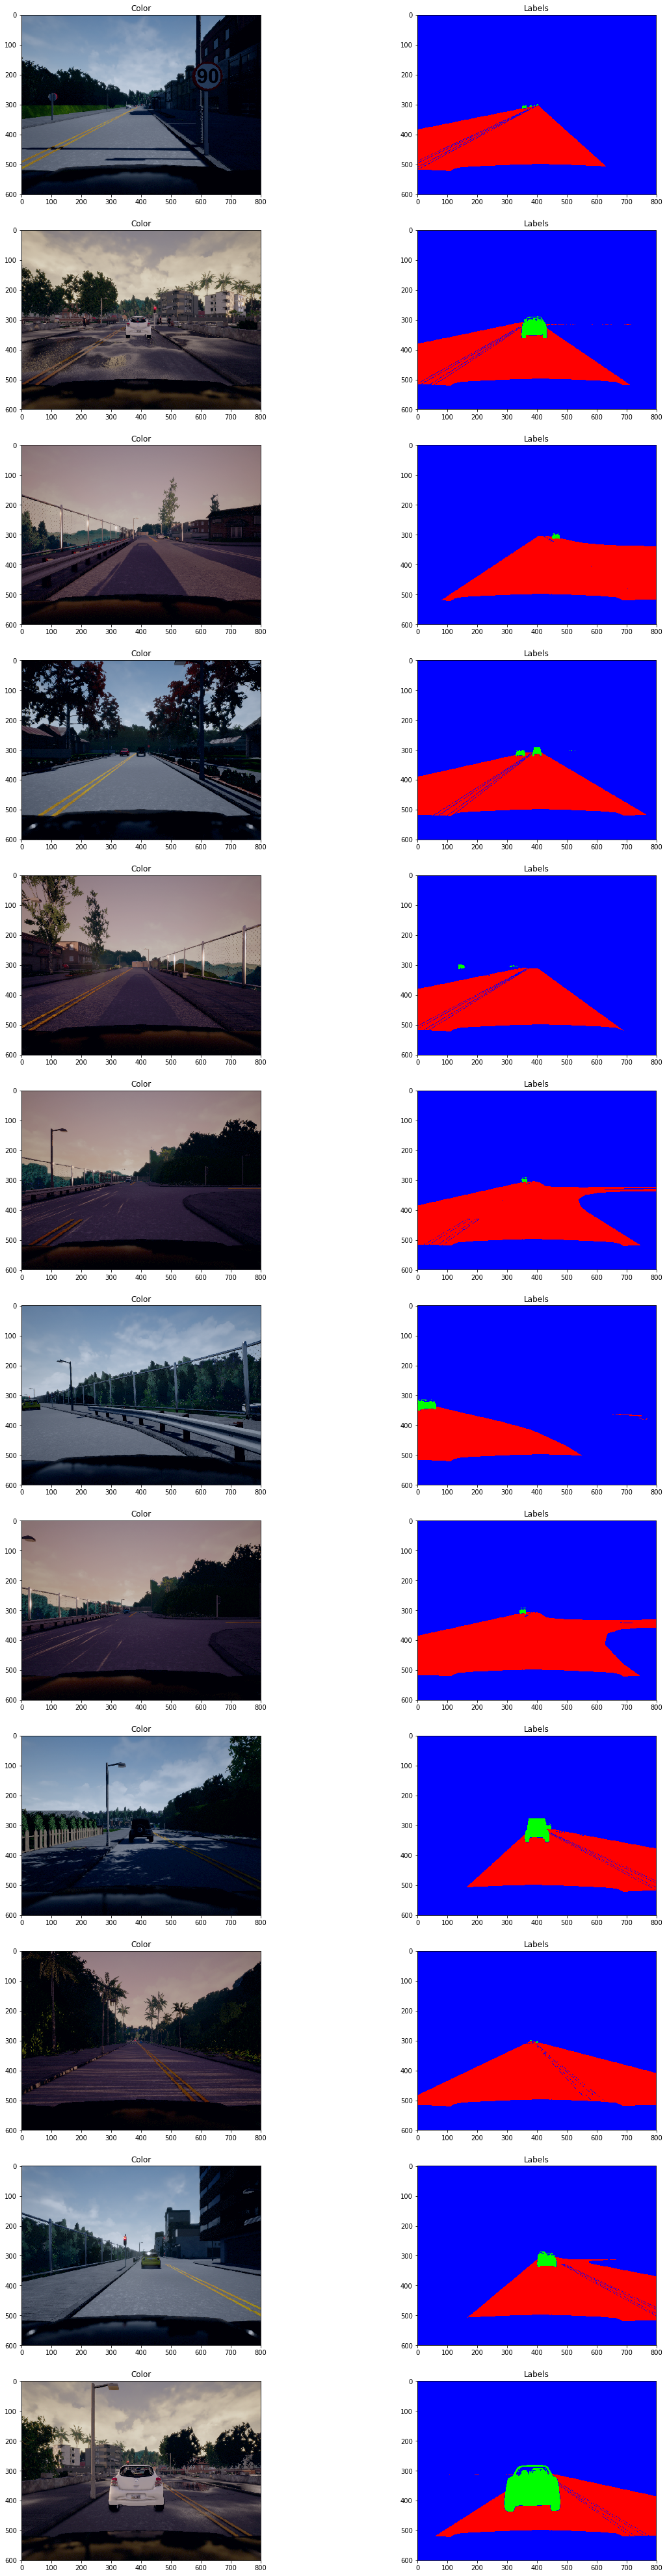

In [54]:
(rgb_batch, lab_batch) = next(train_and_lab_gen)

sample_rows = 12
fig, m_axs = plt.subplots(sample_rows, 2, figsize = (20, 6*sample_rows))
# [c_ax.axis('off') for c_ax in m_axs.flatten()]
for (ax1, ax2), rgb_img, lab_img in zip(m_axs, rgb_batch, lab_batch):
    # undoing the vgg correction is tedious
    r_rgb_img = np.clip(rgb_img+110, 0, 255).astype(np.uint8)
    ax1.imshow(cv2.cvtColor(r_rgb_img, cv2.COLOR_BGR2RGB))
    ax1.set_title('Color')
    ax2.imshow(lab_img)
    ax2.set_title('Labels')

In [ ]:
(rgb_batch, lab_batch) = next(valid_and_lab_gen)

sample_rows = 12
fig, m_axs = plt.subplots(sample_rows, 2, figsize = (20, 6*sample_rows))
# [c_ax.axis('off') for c_ax in m_axs.flatten()]
for (ax1, ax2), rgb_img, lab_img in zip(m_axs, rgb_batch, lab_batch):
    # undoing the vgg correction is tedious
    r_rgb_img = np.clip(rgb_img+110, 0, 255).astype(np.uint8)
    ax1.imshow(r_rgb_img)
    ax1.set_title('Color')
    ax2.imshow(lab_img)
    ax2.set_title('Labels')

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 500 images
## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 500 images


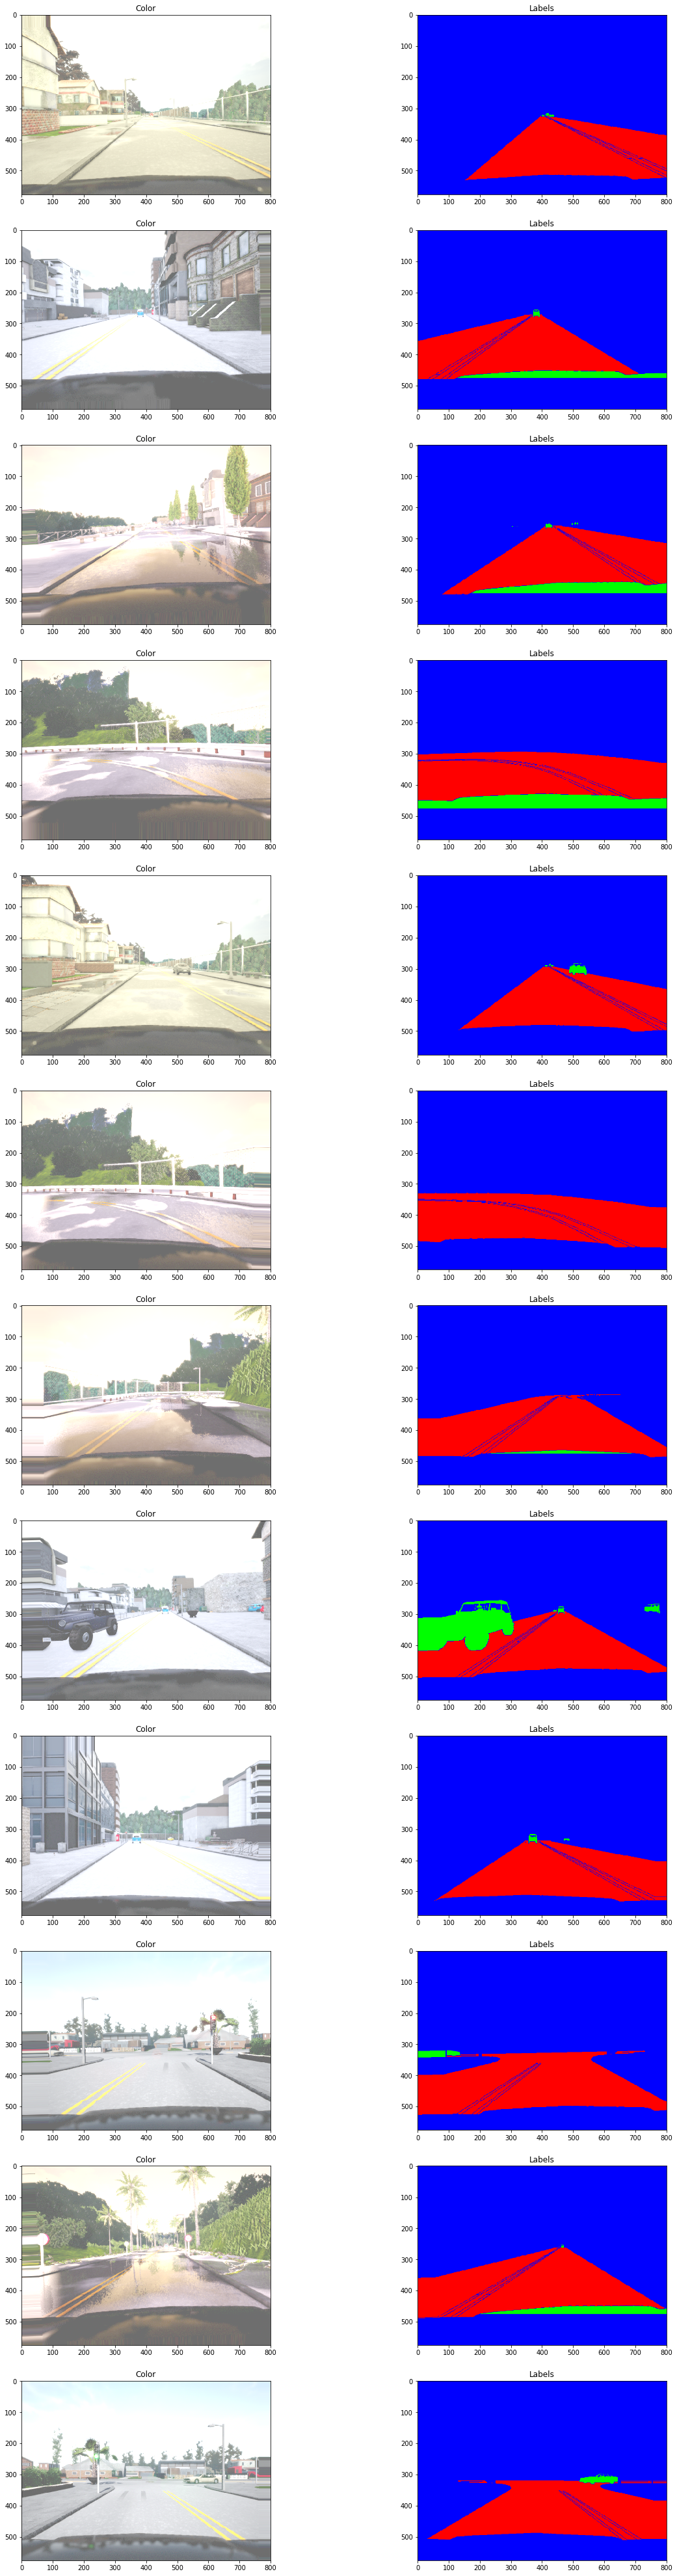

In [12]:
(rgb_batch, lab_batch) = next(test_and_lab_gen)

sample_rows = 12
fig, m_axs = plt.subplots(sample_rows, 2, figsize = (20, 6*sample_rows))
# [c_ax.axis('off') for c_ax in m_axs.flatten()]
for (ax1, ax2), rgb_img, lab_img in zip(m_axs, rgb_batch, lab_batch):
    # undoing the vgg correction is tedious
    r_rgb_img = np.clip(rgb_img+110, 0, 255).astype(np.uint8)
    ax1.imshow(r_rgb_img)
    ax1.set_title('Color')
    ax2.imshow(lab_img)
    ax2.set_title('Labels')

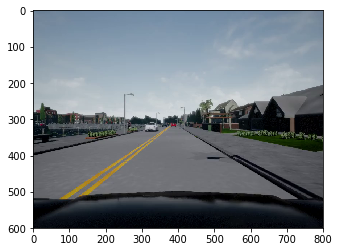

In [17]:
import skvideo.io

video = skvideo.io.vread('../challenge_workspace/test_video.mp4')

plt.imshow(video[0])
